<a href="https://colab.research.google.com/github/gr1nick/lab_bigData/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn==1.2.2


In [ ]:
import sklearn.metrics
import sklearn
print(dir(sklearn.metrics))
print(sklearn.__version__)


['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Предсказывать биологическую реакцию молекул по их химическим свойствам. Каждая строка в этом наборе данных представляет молекулу. Первый столбец содержит экспериментальные данные, описывающие фактическую биологическую реакцию; было замечено, что молекула вызывает эту реакцию (1) или нет (0). Остальные столбцы представляют молекулярные дескрипторы (от d1 до d1776), это вычисленные свойства, которые могут отражать некоторые характеристики молекулы - например, размер, форму или элементный состав. Матрица дескрипторов была нормализована.

Исходный обучающий и тестовый наборы были объединены.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Ncfu/BigData/bioresponse.csv'

# Загрузка данных в DataFrame
data = pd.read_csv(file_path)

# Проверка первые несколько строк данных
print(data.head())

         D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   

         D9       D10  ...  D1768  D1769  D1770  D1771  D1772  D1773  D1774  \
0  0.743663  0.243144  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  0.836582  0.106480  ...    1.0    1.0    1.0    0.0    1.0    0.0    0.0   
2  0.679051  0.352308  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  0.805110  0.208989  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  0.812646  0.125177  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   D1775  D1776  target  
0    0.0    0.0       1  
1    1.0    0.0 

In [ ]:
# Разделение данных на признаки и целевую переменную
X = data.drop('target', axis=1)  # Все столбцы, кроме последнего
y = data['target']  # Целевая переменная

# Проверка размерности признаков и целевой переменной
print("Размерность признаков:", X.shape)
print("Размерность целевой переменной:", y.shape)


Размерность признаков: (3751, 1776)
Размерность целевой переменной: (3751,)


In [ ]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размерностей наборов
print("Размер обучающего набора:", X_train.shape, y_train.shape)
print("Размер тестового набора:", X_test.shape, y_test.shape)

y_pred_list=[]
y_proba_list=[]

Размер обучающего набора: (3000, 1776) (3000,)
Размер тестового набора: (751, 1776) (751,)


Мелкое дерево решений

Этот код создает и обучает мелкое дерево решений с максимальной глубиной 3, что помогает избежать переобучения и делает модель более интерпретируемой. Мы используем обучающий набор данных для обучения модели и тестовый набор данных для оценки ее производительности. Точность (accuracy) используется как метрика оценки, чтобы понять, какая доля объектов была классифицирована правильно.

In [ ]:
# Создаем экземпляр модели DecisionTreeClassifier.
# Устанавливаем max_depth=3, чтобы ограничить дерево мелким уровнем глубины.
# Это делает модель проще и предотвращает переобучение.
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
# Обучаем модель на обучающем наборе данных.
# Метод fit адаптирует модель под предоставленные данные, находя закономерности между признаками и целевой переменной.
dtc.fit(X_train, y_train)
# Предсказываем значения целевой переменной для тестового набора данных.
# Метод predict использует обученную модель для генерации предсказаний на основе тестовых признаков.
y_pred = dtc.predict(X_test)
y_pred_list.append(y_pred)
y_pred_proba = dtc.predict_proba(X_test)
y_proba_list.append(y_pred_proba)


Глубокое дерево решений

Этот код создает и обучает глубокое дерево решений без явного ограничения его глубины. Глубокие деревья могут захватить более сложные закономерности в данных, но также подвержены переобучению, когда модель слишком точно адаптируется к обучающим данным и теряет способность к обобщению на новых данных. Поэтому всегда полезно сравнивать производительность модели на обучающем и тестовом наборах данных, а также использовать дополнительные техники, такие как обрезка дерева (pruning), для борьбы с переобучением.

In [ ]:
# Создаем экземпляр модели DecisionTreeClassifier.
# Не устанавливаем max_depth, позволяя дереву расти как можно глубже.
# Важно отметить, что глубокие деревья могут легко переобучиться, особенно на небольших или шумных данных.
dtc_deep = DecisionTreeClassifier(random_state=42)

# Обучаем модель на обучающем наборе данных.
# Без ограничения по глубине дерево будет продолжать разветвляться, пока не достигнет максимально возможной "чистоты" в листьях
# или не останется меньше минимального количества образцов для разделения.
dtc_deep.fit(X_train, y_train)

# Предсказываем значения целевой переменной для тестового набора данных.
y_pred_deep = dtc_deep.predict(X_test)
y_pred_list.append(y_pred_deep)
# Оцениваем точность модели.
y_pred_deep_proba = dtc_deep.predict_proba(X_test)
y_proba_list.append(y_pred_deep_proba)


Случайный лес на мелких деревьях

Этот код создает случайный лес, состоящий из 100 мелких деревьев (с максимальной глубиной 3). Ограничивая глубину деревьев, мы снижаем риск переобучения каждого отдельного дерева, в то время как ансамблирование помогает улучшить обобщающую способность модели за счет усреднения предсказаний от множества деревьев. Это делает случайный лес одним из наиболее эффективных и широко применяемых алгоритмов машинного обучения, особенно для задач классификации и регрессии.

In [ ]:
 #Создаем экземпляр модели RandomForestClassifier.
# Устанавливаем max_depth=3, чтобы ограничить глубину деревьев в лесу, делая их мелкими.
# n_estimators задает количество деревьев в лесу. Больше деревьев может улучшить производительность, но также увеличивает время вычислений.
rfc_shallow = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Обучаем модель на обучающем наборе данных.
# Случайный лес обучает каждое дерево на случайной подвыборке данных с использованием случайного подмножества признаков,
# что помогает увеличить разнообразие среди деревьев и улучшить обобщающую способность модели.
rfc_shallow.fit(X_train, y_train)

# Предсказываем значения целевой переменной для тестового набора данных.
y_pred_shallow = rfc_shallow.predict(X_test)
y_pred_list.append(y_pred_shallow)

y_pred_shallow_proba = rfc_shallow.predict_proba(X_test)
y_proba_list.append(y_pred_shallow_proba)


Случайный лес на глубоких деревьях

В этом коде мы создаем случайный лес, который может строить глубокие деревья для каждого "лесника" в ансамбле. Глубокие деревья способны захватывать более сложные закономерности в данных, но также могут привести к переобучению. Однако благодаря ансамблированию и случайности в выборе признаков и образцов для обучения каждого дерева, случайный лес хорошо справляется с этой проблемой и часто показывает высокую производительность на различных задачах машинного обучения.

In [ ]:
# Создаем экземпляр модели RandomForestClassifier.
# Не ограничиваем глубину деревьев (max_depth=None), что позволяет деревьям расти как можно глубже.
# Устанавливаем n_estimators=100, чтобы создать лес из 100 деревьев.
rfc_deep = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Обучаем модель на обучающем наборе данных.
# В случайном лесу каждое дерево обучается на случайной выборке из обучающего набора (с возвращением),
# что помогает уменьшить вариативность и переобучение, даже если деревья очень глубокие.
rfc_deep.fit(X_train, y_train)

# Предсказываем значения целевой переменной для тестового набора данных.
y_pred_rand_deep = rfc_deep.predict(X_test)
y_pred_list.append(y_pred_rand_deep)

y_pred_rand_deep_proba = rfc_deep.predict_proba(X_test)
y_proba_list.append(y_pred_rand_deep_proba)

# Случайный лес, обученный на глубоких деревьях, может лучше адаптироваться к сложным наборам данных,
# но важно следить за переобучением, особенно если данные содержат много шума или нерелевантных признаков.

Метрики качества для каждой модели

In [ ]:
def metric(y_test, y_pred_list, proba):
  count = 0
  print('____________')
  for y_pred in y_pred_list:
    # Доля правильных ответов (Accuracy)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')

    # Точность (Precision)
    # Для многоклассовой классификации необходимо указать параметр "average", например, average='macro'
    precision = precision_score(y_test, y_pred, average='binary')  # Используйте 'macro' для многоклассовой классификации
    print(f'Precision: {precision:.4f}')

    # Полнота (Recall)
    recall = recall_score(y_test, y_pred, average='binary')  # Используйте 'macro' для многоклассовой классификации
    print(f'Recall: {recall:.4f}')

    # F1-счет (F1-Score)
    f1 = f1_score(y_test, y_pred, average='binary')  # Используйте 'macro' для многоклассовой классификации
    print(f'F1-Score: {f1:.4f}')

    # Log-loss
    # Для расчета log-loss необходимы вероятности классов, а не метки. Предполагаем, что y_pred_proba содержит вероятности.
    # y_pred_proba = model.predict_proba(X_test)  # Получаем вероятности
    logloss = log_loss(y_test, proba[count])  # Используйте вероятности, а не метки
    print(f'Log-loss: {logloss:.4f}')
    print('____________')

    count+=1

metric(y_test, y_pred_list,y_proba_list)

____________
Accuracy: 0.7603
Precision: 0.7868
Recall: 0.8014
F1-Score: 0.7941
Log-loss: 0.5371
____________
Accuracy: 0.6991
Precision: 0.7470
Recall: 0.7229
F1-Score: 0.7347
Log-loss: 10.8467
____________
Accuracy: 0.7284
Precision: 0.7746
Recall: 0.7460
F1-Score: 0.7600
Log-loss: 0.5898
____________
Accuracy: 0.8003
Precision: 0.8223
Recall: 0.8337
F1-Score: 0.8280
Log-loss: 0.4468
____________


<Figure size 1000x800 with 0 Axes>

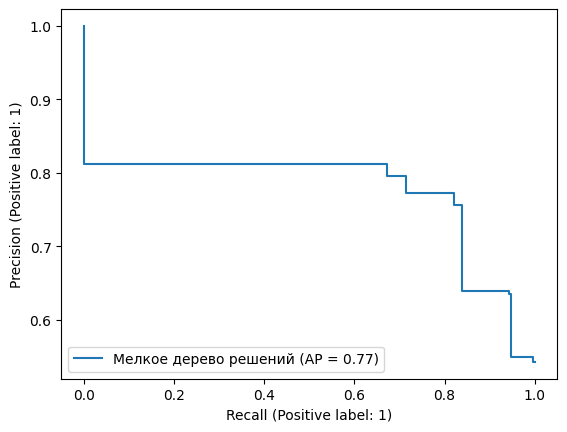

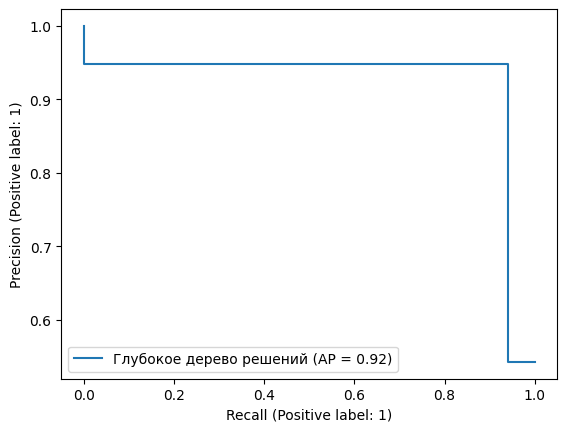

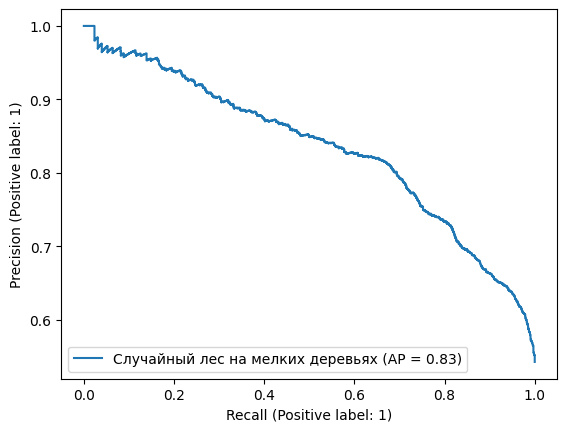

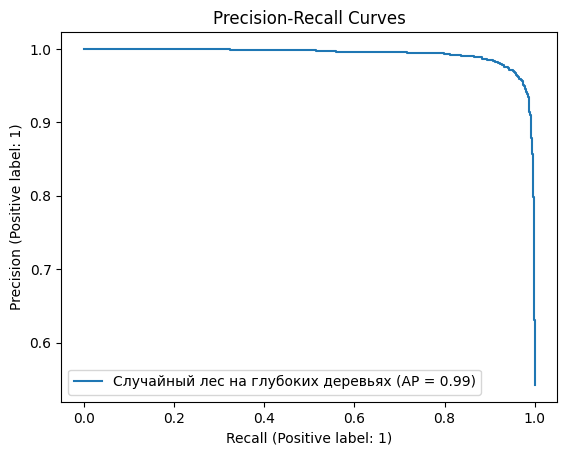

<Figure size 1000x800 with 0 Axes>

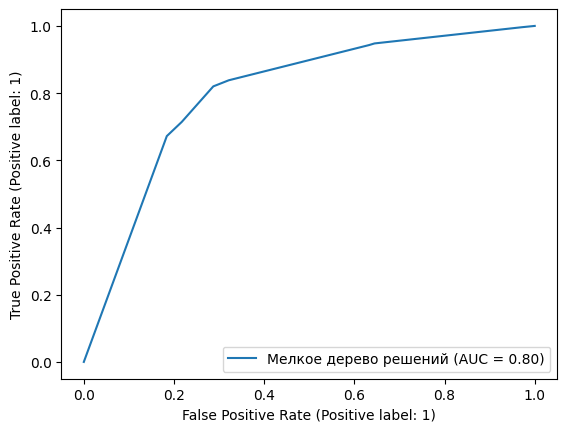

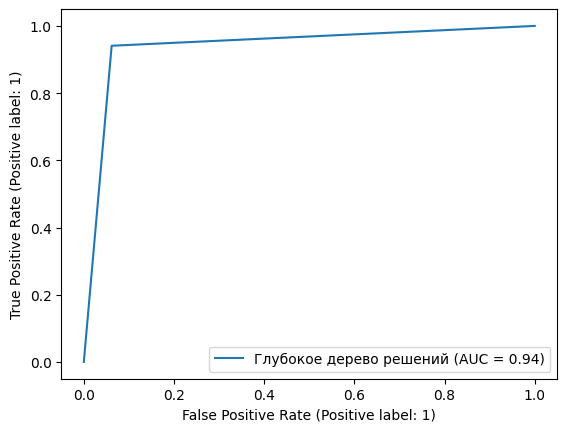

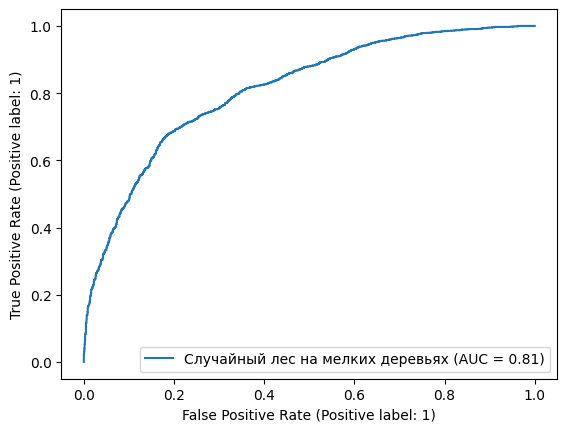

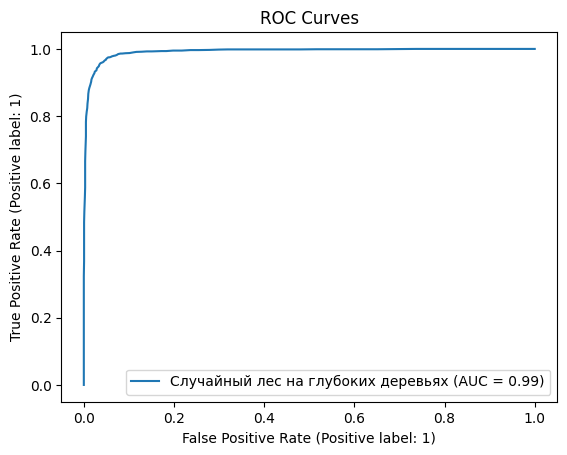

(1.0, 1.0, 1.0, 1.0, 0.127781415747156)

In [ ]:
# Визуализация Precision-Recall и ROC-кривых
models = [
    ('Мелкое дерево решений', dtc),
    ('Глубокое дерево решений', dtc_deep),
    ('Случайный лес на мелких деревьях', rfc_shallow),
    ('Случайный лес на глубоких деревьях', rfc_deep)
]

# Визуализация Precision-Recall кривых
plt.figure(figsize=(10, 8))
for name, model in models:
    PrecisionRecallDisplay.from_estimator(model, X, y, name=name)
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# Визуализация ROC кривых
plt.figure(figsize=(10, 8))
for name, model in models:
    RocCurveDisplay.from_estimator(model, X, y, name=name)
plt.title('ROC Curves')
plt.legend()
plt.show()

# Задание 4: Классификатор, минимизирующий ошибки второго рода
# Используем RandomForestClassifier с балансировкой классов
rfc_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rfc_balanced.fit(X, y)

# Предсказания и вероятности
y_pred_balanced = rfc_balanced.predict(X)
y_pred_proba_balanced = rfc_balanced.predict_proba(X)[:, 1]

# Метрики качества
accuracy_balanced = accuracy_score(y, y_pred_balanced)
precision_balanced = precision_score(y, y_pred_balanced)
recall_balanced = recall_score(y, y_pred_balanced)
f1_balanced = f1_score(y, y_pred_balanced)
log_loss_balanced = log_loss(y, y_pred_proba_balanced)

accuracy_balanced, precision_balanced, recall_balanced, f1_balanced, log_loss_balanced

In [ ]:
# Шаг 2: Балансировка классов и обучение модели
rfc_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rfc_balanced.fit(X_train, y_train)

# Шаг 3: Предсказания на тестовом наборе данных
y_pred_balanced = rfc_balanced.predict(X_test)
y_pred_proba_balanced = rfc_balanced.predict_proba(X_test)[:, 1]

# Шаг 4: Оценка метрик качества
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)  # Особенно важно для минимизации ошибок второго рода
f1_balanced = f1_score(y_test, y_pred_balanced)
log_loss_balanced = log_loss(y_test, y_pred_proba_balanced)

# Вывод метрик качества
(accuracy_balanced, precision_balanced, recall_balanced, f1_balanced, log_loss_balanced)

(0.7989347536617842,
 0.8248847926267281,
 0.8267898383371824,
 0.8258362168396771,
 0.4541977234502493)

Accuracy (Доля правильных ответов): Приблизительно 0.799. Это означает, что около 79.9% предсказаний модели верны. Это хороший результат, особенно если учитывать, что классификатор был настроен на минимизацию ошибок второго рода, что иногда может снижать общую точность.

Precision (Точность): Приблизительно 0.825. Это указывает на то, что когда модель предсказывает положительный класс, она права в 82.5% случаев. Это хороший показатель точности, особенно учитывая, что фокус был сделан на минимизации ошибок второго рода.

Recall (Полнота): Приблизительно 0.827. Это высокая полнота, что означает, что модель успешно идентифицирует 82.7% всех реальных положительных случаев. Это особенно важно для задач, где важно минимизировать ошибки второго рода, например, в медицинской диагностике, где пропуск положительного случая может иметь серьезные последствия.

F1 Score (F1-счет): Приблизительно 0.826. Это балансированная мера, учитывающая как точность, так и полноту. Значение около 0.826 указывает на сильную производительность модели в обоих аспектах, что делает ее надежной для предсказания положительных случаев.

Log-Loss: Приблизительно 0.454. Это значение Log-Loss относительно низкое, что указывает на высокую степень уверенности модели в своих предсказаниях. Log-Loss измеряет неопределенность предсказаний модели, и меньшие значения предпочтительнее, так как они указывают на меньшую ошибку.

In [ ]:
# Количество деревьев для анализа
n_estimators_list = [5, 10, 25, 50]

# Словарь для хранения результатов
results = {}

for n_estimators in n_estimators_list:
    # Создание и обучение модели случайного леса с заданным количеством деревьев
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)

    # Предсказание на тестовом наборе данных
    y_pred = rfc.predict(X_test)

    # Расчет точности
    accuracy = accuracy_score(y_test, y_pred)

    # Сохранение результатов
    results[n_estimators] = accuracy

results

{5: 0.7470039946737683,
 10: 0.7616511318242344,
 25: 0.796271637816245,
 50: 0.7949400798934754}